# Artificial Intelligence 2023/2024

## First assignment: Informed and adversarial search strategies

### Submission: April 2, 2024
### Grading:  This assignment represents 20% of the grade for the course (4 values). If you implement more than what is requested you can get additionally a maximum of 1 value, that can complement the grade obtained globally for the project’s part.
### Authors: Alexandre Sousa (202206427), Francisco Carqueija (202205113), Guilherme Oliveira (202204987)

------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [12]:
import matplotlib.pyplot as plt
from tabulate import tabulate

------------------------------------------------------------------------------------------------------------------------------------------------------------------

## What number of iterations should we run on our Monte Carlo Algorithm?

To answer this question, we measured using the function the average time the CPU needs to choose a column for 10 games, using 8000, 10000, 11000 and 130000 iterations. To do this we used the python module timeit to measure the time it would take for each algorithm to make a move and matplotlib to plot the results.
The results were as follows:

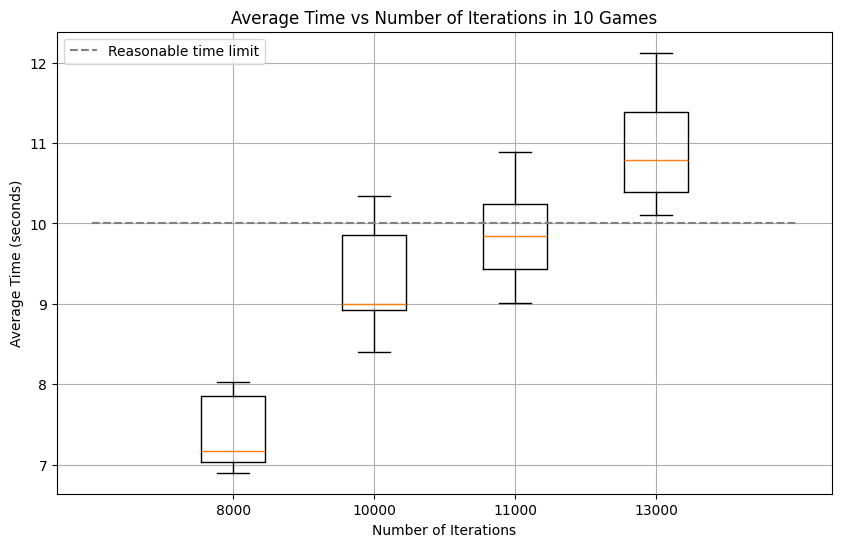

In [13]:
def avg_mcts_times_plot():
    # Average time measures for different numbers of iterations
    iterations = [8000, 10000, 11000, 13000]
    avg_times = [
        [7.2342, 7.9754, 7.0123, 6.899, 7.1034, 8.0234, 8.0243, 7.5044, 7.1023, 6.9689],
        [8.4213, 8.9853, 8.8984, 10.003, 10.342, 8.9843, 9.3919, 9.0123, 10.0123, 8.3991],
        [10.2467, 10.8931, 10.2039, 9.433, 10.795, 9.3044, 9.0123, 9.9834, 9.6953, 9.43123],
        [10.5694, 10.543, 11.4134, 12.12331, 10.2312, 10.103, 11.2930, 11.002, 10.334, 11.938]
    ]

    # Plotting
    plt.figure(figsize=(10, 6))

    # Creating box plots for each number of iterations
    plt.boxplot(avg_times, labels=iterations)

    # Plotting intermittent line for "Reasonable time limit"
    plt.plot([0, 5], [10, 10], '--', color='gray', label='Reasonable time limit')

    # Adding labels and title
    plt.xlabel('Number of Iterations')
    plt.ylabel('Average Time (seconds)')
    plt.title('Average Time vs Number of Iterations in 10 Games')
    plt.legend()
    plt.grid(True)

    # Displaying the plot
    plt.show()
avg_mcts_times_plot()

- Upon analysis of the data, it becomes evident that both 11,000 and 13,000 iterations per run must be dismissed, as their average execution time goes beyond what we defined as acceptable (10 seconds). So now we proceeded to take a look on how the number of iterations affect "how smart" the CPU is able to make good moves.

- To do this, we decided to play the Monte Carlo Algorithm against another Monte Carlo Algorithm using a diferent number of iterations, and the results are shown below:

In [14]:
def data_table_mcts():

    # Sample data
    data = {
        'CPU1 VS CPU2': ['10.000  vs 8.000 '],
        '   CPU1 WINS': [12],
        '   CPU1 LOSSES': [2]
    }

    headers = data.keys()
    rows = zip(*data.values())
    table = tabulate(rows, headers=headers, tablefmt='grid')

    # Displaying the table
    print(table)
data_table_mcts()


+------------------+----------------+------------------+
| CPU1 VS CPU2     |      CPU1 WINS |      CPU1 LOSSES |
+==================+================+==================+
| 10.000  vs 8.000 |             12 |                2 |
+------------------+----------------+------------------+


#### So, after considering these outputs, we decided that using 10000 iterations per call would be the best choice.

After that, we tested several C values to figure wich value should we use, and here are the results that we obtained:


                                    1.4 vs 2.0   ->  6 wins //  8 wins
                                    2.0 vs 0.5   ->  6 wins // 8 wins
                                    4.0 vs 0.5   ->  6 wins //  8 wins

#### So we decided to choose C = 0.5

------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Wich depth should we choose for our Minimax Algorithm?  

To answear this question we measured the average time each depth takes to make a play in 10 diferent games. After that, we wrote down the results and plotted them. To do this we also used the python module timeit to measure the time it would take for each algorithm to make a move and matplotlib to plot the results. The results were as follows:

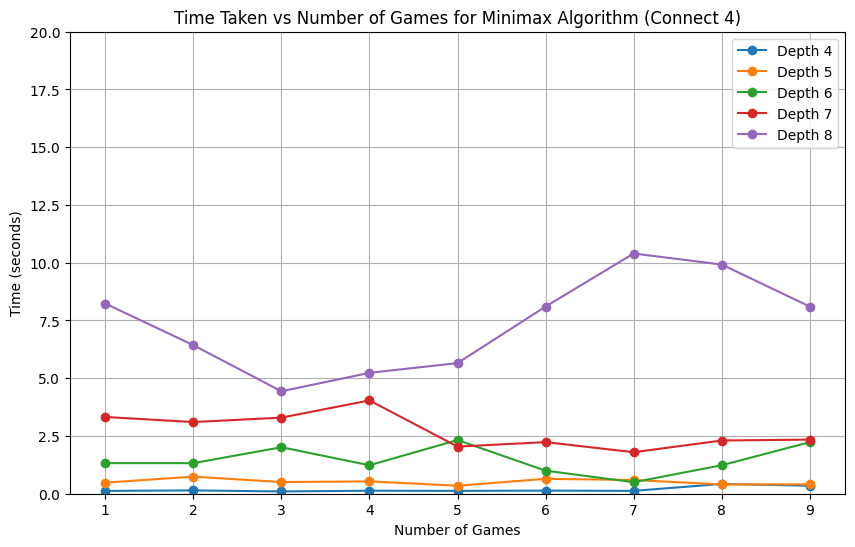

In [15]:
def avg_minimax_times_plot():
    depths = [4, 5, 6, 7, 8]

    avg_times = [
        [0.1223, 0.1433, 0.0981, 0.1302, 0.1235, 0.1345, 0.1234, 0.4234, 0.345],
        [0.4793, 0.740, 0.5044, 0.5340, 0.3455, 0.6450, 0.5943, 0.40304, 0.4050],
        [1.3234, 1.3234, 2.0123, 1.2323, 2.3232, 0.9983, 0.49930, 1.23232, 2.2323],
        [3.3232, 3.1023, 3.29341, 4.0392, 2.03943, 2.2343, 1.7963, 2.3030, 2.34302],
        [8.2323, 6.4322, 4.4342, 5.23323, 5.6545, 8.10239, 10.39923, 9.9203, 8.102939]
    ]

    num_games = range(1, len(avg_times[0]) + 1)

    plt.figure(figsize=(10, 6))

    for i, depth in enumerate(depths):
        plt.plot(num_games, avg_times[i], label=f'Depth {depth}', marker='o')

    plt.title('Time Taken vs Number of Games for Minimax Algorithm (Connect 4)')
    plt.xlabel('Number of Games')
    plt.ylabel('Time (seconds)')
    plt.ylim(0, 20)  # Set y-axis limit
    plt.grid(True)
    plt.legend()
    plt.show()
avg_minimax_times_plot()

- For the depths 7 and 8, the Minimax Algorithm takes much more time than we would prefer, so we decided to discard them. 
- Then, we proceeded to evaluate the performance of the other algorithms by having them compete against each other. To ensure the reliability of the results, we initiated the game by selecting every possible first column for each algorithm, thereby observing how they adapt to the game and avoiding repetitive board patterns. 
- We conducted 7 simulations where one of the depths starting and then more 7 simultations with the other depth starting and here are the results:

In [16]:
def data_table_minimax():
    
    # Sample data
    data = {
        'CPU1  VS CPU2': ['5 vs 4 and 4 vs 5 (CP1 IS 5)', ' 6 vs 4 and 4 vs 6 (CP1 IS 6) ', '6 vs 5 and 5 vs 6 (CP1 IS 6)'],
        '   CPU1 WINS': [7,14,12],
        '   CPU1 LOSSES': [7,0, 2]
    }

    headers = data.keys()
    rows = zip(*data.values())
    table = tabulate(rows, headers=headers, tablefmt='grid')

    # Displaying the table
    print(table)

data_table_minimax()

+------------------------------+----------------+------------------+
| CPU1  VS CPU2                |      CPU1 WINS |      CPU1 LOSSES |
+==============================+================+==================+
| 5 vs 4 and 4 vs 5 (CP1 IS 5) |              7 |                7 |
+------------------------------+----------------+------------------+
| 6 vs 4 and 4 vs 6 (CP1 IS 6) |             14 |                0 |
+------------------------------+----------------+------------------+
| 6 vs 5 and 5 vs 6 (CP1 IS 6) |             12 |                2 |
+------------------------------+----------------+------------------+


#### So, with these results, we decided to select depth 6 for our Minimax Algorithm, since it is the one who won the most games in a reasonable amount of time